In [1]:
import pandas as pd
import re 
import sys
import numpy as np
import matplotlib as mat
from matplotlib import pyplot
import seaborn as sb
from io import StringIO

df = pd.read_excel('Intrusion_detection_dataset.xlsx')
df.head()
df.dropna()
df.shape

(26013, 42)

In [2]:
#Creation of new column -- Major attacks are categorizes as 'DOS', 'U2R', 'R2L', "probe"
df['Main_label'] = df['label']

df.loc[df.Main_label == "back", 'Main_label'] = "DOS"
df.loc[df.Main_label == "land", 'Main_label'] = "DOS"
df.loc[df.Main_label == "neptune", 'Main_label'] = "DOS"
df.loc[df.Main_label == "pod", 'Main_label'] = "DOS"
df.loc[df.Main_label == "smurf", 'Main_label'] = "DOS"
df.loc[df.Main_label == "teardrop", 'Main_label'] = "DOS"
df.loc[df.Main_label == "normal", 'Main_label'] = "normal"
df.loc[df.Main_label == "buffer_overflow", 'Main_label'] = "U2R"
df.loc[df.Main_label == "loadmodule", 'Main_label'] = "U2R"
df.loc[df.Main_label == "perl", 'Main_label'] = "U2R"
df.loc[df.Main_label == "rootkit", 'Main_label'] = "U2R"
df.loc[df.Main_label == "ftp_write", 'Main_label'] = "R2L"
df.loc[df.Main_label == "guess_passwd", 'Main_label'] = "R2L"
df.loc[df.Main_label == "imap", 'Main_label'] = "R2L"
df.loc[df.Main_label == "multihop", 'Main_label'] = "R2L"
df.loc[df.Main_label == "phf", 'Main_label'] = "R2L"
df.loc[df.Main_label == "spf", 'Main_label'] = "R2L"
df.loc[df.Main_label == "warezclient", 'Main_label'] = "R2L"
df.loc[df.Main_label == "warezmaster", 'Main_label'] = "R2L"

df.loc[df.Main_label == "nmap", 'Main_label'] = "probe"
df.loc[df.Main_label == "ipsweep", 'Main_label'] = "probe"
df.loc[df.Main_label == "portsweep", 'Main_label'] = "probe"
df.loc[df.Main_label == "satan", 'Main_label'] = "probe"

temp_df = df[df.Main_label=="R2L"]
print(temp_df['Main_label'].shape[0])


1122


Text(0.5, 1.0, 'Distribution of Attacks in Computer Netwok')

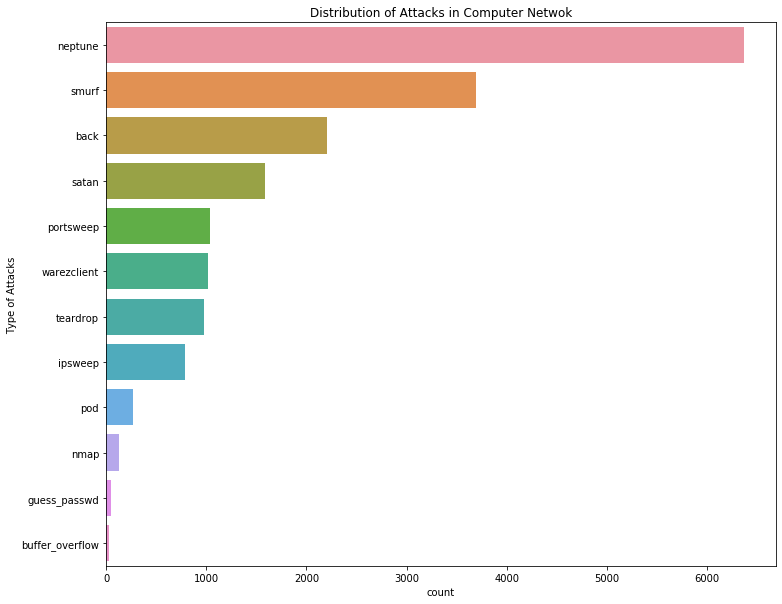

In [3]:
fig, ax = pyplot.subplots(figsize=(12,10))
plot = sb.countplot(y=df['label'], order=[
    'neptune', 'smurf', 'back',
    'satan','portsweep','warezclient', 'teardrop','ipsweep',
    'pod','nmap', 'guess_passwd','buffer_overflow'])
plot.set_ylabel('Type of Attacks')
plot.set_title('Distribution of Attacks in Computer Netwok')

In [43]:
attack_count = []
df2_temp = df[(df.protocol_type=="tcp") & (df.Main_label=="DOS")]
attack_count.append(df2_temp['Main_label'].value_counts()[0])

df3_temp = df[(df.protocol_type=="tcp") & (df.Main_label=="R2L")]
attack_count.append(df3_temp['Main_label'].value_counts()[0])

df4_temp = df[(df.protocol_type=="tcp") & (df.Main_label=="U2R")]
attack_count.append(df4_temp['Main_label'].value_counts()[0])

df5_temp = df[(df.protocol_type=="tcp") & (df.Main_label=="probe")]
attack_count.append(df5_temp['Main_label'].value_counts()[0])

df6_temp = df[(df.protocol_type=="udp") & (df.Main_label=="DOS")]
attack_count.append(df6_temp['Main_label'].value_counts()[0])

# there is no data for protocol udp and type r2l

df8_temp = df[(df.protocol_type=="udp") & (df.Main_label=="U2R")]
attack_count.append(df8_temp['Main_label'].value_counts()[0])

df9_temp = df[(df.protocol_type=="udp") & (df.Main_label=="probe")]
attack_count.append(df9_temp['Main_label'].value_counts()[0])

df10_temp = df[(df.protocol_type=="icmp") & (df.Main_label=="DOS")]
attack_count.append(df10_temp['Main_label'].value_counts()[0])

# there is no data for protocol_type "icmp"  & attack "R2L"

# there is no data for protocol_type "icmp"  & attack "U2R"

df13_temp = df[(df.protocol_type=="icmp") & (df.Main_label=="probe")]
attack_count.append(df13_temp['Main_label'].value_counts()[0])

print(attack_count)

[8572, 1122, 45, 2652, 979, 3, 195, 3959, 699]


(-1.1004421009256227,
 1.1000210524250296,
 -1.108735231852545,
 1.1201565018573931)

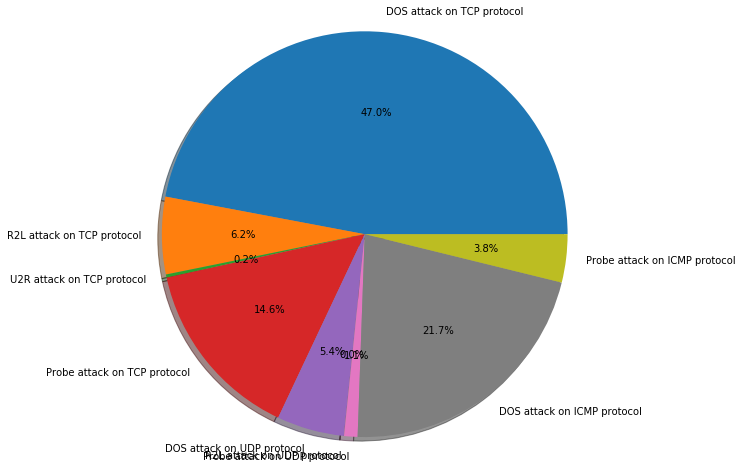

In [49]:
fig, ax1 = pyplot.subplots(figsize=(8,8))
attrs1 = ['DOS attack on TCP protocol', 'R2L attack on TCP protocol', 'U2R attack on TCP protocol', 'Probe attack on TCP protocol',
    'DOS attack on UDP protocol','R2L attack on UDP protocol', 'Probe attack on UDP protocol',
        'DOS attack on ICMP protocol','Probe attack on ICMP protocol']
ax1.pie(attack_count, labels=attrs1, autopct='%1.1f%%', shadow=True)

ax1.axis('equal')